### The cart pole problem using a gridded state space 
This notebook contain an implementation of Q-learning for the cart pole problem 
using a gridded state space.

In [1]:
from CartPole.CPio import *
from CartPole.CPlearn import * 
from CartPole.CPstates import *
from CartPole.CPutils import *

from matplotlib import pyplot as plt
import datetime
import gymnasium as gym

#### Key Q-learning parameters
- n_epiodes - number of training episodes
- gamma - discount factor for future rewards
- epsilon - probability of exploration
- alpha - Q update fraction, learning rate
- nbins - number of bins in each dimension
- a - position extramal value
- b - velocity extremal value
- c - angular position extremal value
- d - angular valocity extremal value
- log_interval - interval for printed output during training

In [2]:
# Set some job specific parameters
n_episodes = 100000 # number of episodes to train

gamma = 0.9 # discount factor for future rewards
epsilon = 0.2 # probability of exploration
alpha = 0.1 # Q update fraction, learning rate

nbins = 20 # number of bins in each dimenstion
a = 0.4 # position extramal value
b = 2.0 # velocity extremal value
c = 0.3 # angular position extremal value
d = 0.1 # angular valocity extremal value

log_interval = 5000 # logging interval

#### Initialize the environment, the grid, and the Q table
For each epside keep track of these values
- game_length - length of each episode
- inf_norm - infinity norm of change in Q values for each episode
- l2_norm - l2 norm on change in Q values for each episode
- terminal_states - a dictionary of states where done flag has been set
- visited_states - a dictionary that maps states to number of times visited

In [3]:
# initialize CartPole and set max steps per episode
env = gym.make('CartPole-v1')
# initialize Grid class to hold the edges of the observation space 
grid = Grid(nbins,a,b,c,d)
# initialize Q-values
Q = init_Q(grid)
# save information from each episode
game_length = [] # game_length for each episode
inf_norm = [] # infinity norm for change in Q values for each episode
l2_norm = [] # l2 norm on change in Q values for each episode
terminal_states = {} # a dictionary of states where done flag has been set
visited_states = {} # a dictionary that maps states to number of times visited

#### Q-Learning main loop
The learn_q functiop plays one episode from the initial state and returns the length of the episode, the infinity norm of the change in Q values, and the l2 norm of the change in Q values. The Q values are updated in place. The visited states and terminal states dictionaries are also updated in place.

Some information is periodically printed during training to monitor training progress. The length of the training time depends on the number of training episodes. Training episodes become longer as the number of episodes increases, because the number of steps the pole remains balanced increases.

The learn_q function is in the CPlearn.py file.

In [4]:
# Caution: if n_episodes is large, this may take a while to run

begin = datetime.datetime.now()
for i in range(n_episodes+1):
    length, infnorm, l2norm = learn_Q(env,grid,gamma,epsilon,alpha,Q,visited_states,terminal_states)
    game_length.append(length)
    inf_norm.append(infnorm)
    l2_norm.append(l2norm)
    if i%log_interval == 0:
        print(f"{i:<8} {length:>5}  {str(datetime.datetime.now())}", flush=True)
end = datetime.datetime.now()
interval = end - begin

0           12  2023-04-10 11:33:39.232175
5000        20  2023-04-10 11:33:40.091417
10000       21  2023-04-10 11:33:41.163859
15000       18  2023-04-10 11:33:42.305233
20000       20  2023-04-10 11:33:43.547529
25000       24  2023-04-10 11:33:44.854859
30000       65  2023-04-10 11:33:46.299022
35000       16  2023-04-10 11:33:47.801924
40000       26  2023-04-10 11:33:49.388027
45000       28  2023-04-10 11:33:51.238985
50000       55  2023-04-10 11:33:53.471628
55000       44  2023-04-10 11:33:56.017482
60000      106  2023-04-10 11:33:58.925121
65000       28  2023-04-10 11:34:01.931757
70000       26  2023-04-10 11:34:04.924345
75000       42  2023-04-10 11:34:08.032192
80000       34  2023-04-10 11:34:11.277584
85000      187  2023-04-10 11:34:14.632997
90000       42  2023-04-10 11:34:18.131656
95000       63  2023-04-10 11:34:21.502223
100000      44  2023-04-10 11:34:25.104673


##### Print some information about the training time

In [5]:
print(f"Training time:        {interval}")
print(f"Training start time:  {begin}")
print(f"Training end time:    {end}")

Training time:        0:00:45.873408
Training start time:  2023-04-10 11:33:39.231706
Training end time:    2023-04-10 11:34:25.105114


#### Training diagnostic plots
These figures show the training progressed during the Q-learning training algorithm. The show - 
1. A histogram of the length of each episode
2. A scatter plot of the length of each episode vs episode number 
3. The l2 norm of the change in Q values vs episode number
3. The infinity norm of the change in Q values vs episode number

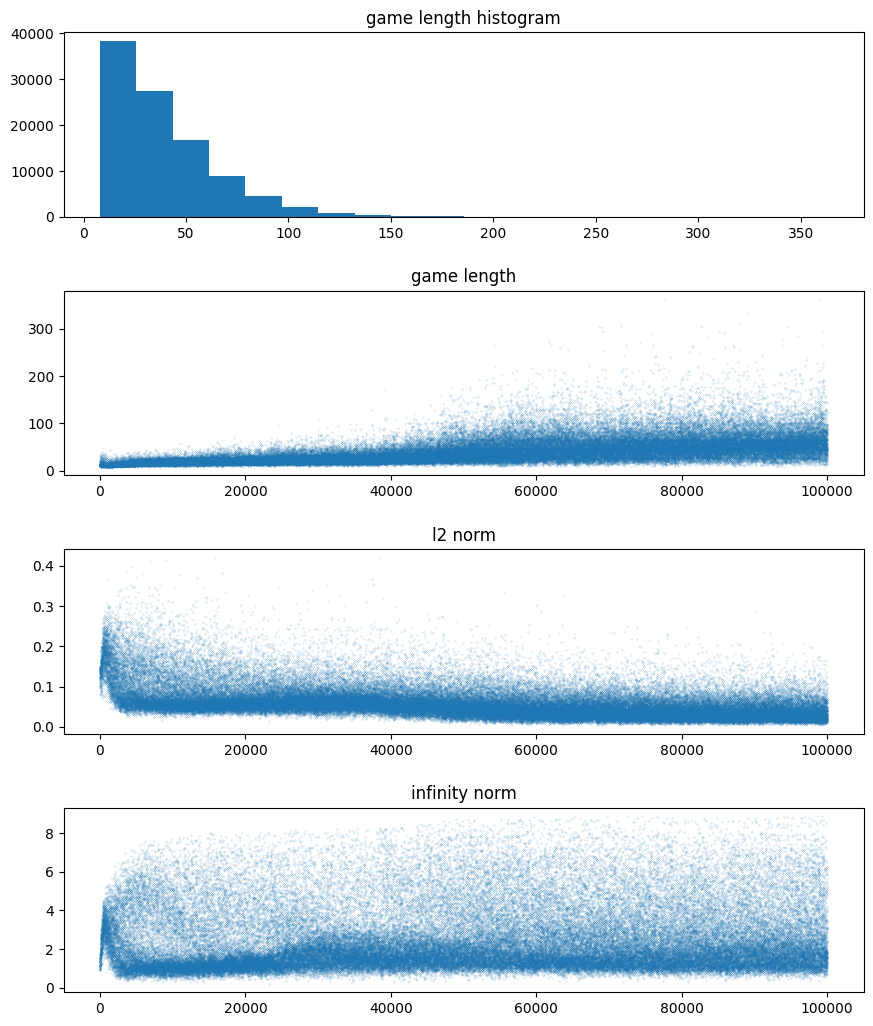

In [6]:
# create figures
_, axs = plt.subplots(4,figsize=(10,12))

plt.subplots_adjust(left=0.1,
                bottom=0.1,
                right=0.9,
                top=0.9,
                wspace=0.4,
                hspace=0.4)

axs[0].hist(game_length, 20)
axs[0].set_title("game length histogram")

iter_vals = [x for x in range(len(inf_norm))]
axs[1].scatter(iter_vals,game_length,s=0.01)
axs[1].set_title("game length")

axs[2].scatter(iter_vals,l2_norm,s=0.01)
axs[2].set_title("l2 norm")

axs[3].scatter(iter_vals,inf_norm,s=0.01)
axs[3].set_title("infinity norm")

plt.show()

#### Playing cart pole with the trained Q-table
During training the epsilon greedy strategy is used to explore the consequences of suboptimal decisions. This means tha the length of the training episode may be reduced. In the cell below, the game is played with the final trained Q-table to see how good it performs. The parameter n_test_episodes sets the number of times the game is played. The length of the games is saved in the rewards list.

In [7]:
n_test_episodes = 10000

pi = Q_to_policy(grid,Q)
rewards = []
for i in range(n_test_episodes):
    reward, _ = play_game(env,grid,pi)
    rewards.append(reward)


#### Rewards descriptive statistics
This celll shows descriptive statistics of the values in the rewards list.

In [8]:
import pandas as pd
s = pd.Series(rewards)
s.describe()

count    10000.000000
mean        72.831500
std         37.945088
min         16.000000
25%         53.000000
50%         65.000000
75%         82.000000
max       1148.000000
dtype: float64

#### Rewards figures
This cell show a histogram that shows the frequency of episode lengths as well a scatter plot of the episode length vs episode number. 

The maximum length of an episode may skew the figure so that most of the data is in a small band. Set the rewards_max value to a smaller number to expand the figure.

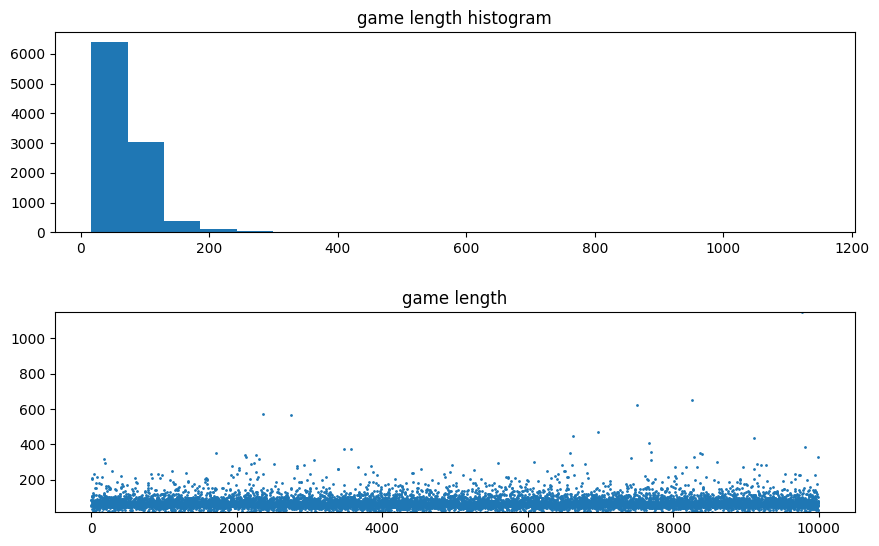

In [9]:
rewards_min = min(rewards)
rewards_max = max(rewards)
# rewards_max = 500
rewards_range = (rewards_min,rewards_max)

_, axs = plt.subplots(2,figsize=(10,6))

plt.subplots_adjust(left=0.1,
                bottom=0.1,
                right=0.9,
                top=0.9,
                wspace=0.4,
                hspace=0.4)

axs[0].hist(rewards, 20, range=rewards_range)
axs[0].set_title("game length histogram")

iter_vals = [x for x in range(len(rewards))]
axs[1].scatter(iter_vals,rewards,s=1)
axs[1].set_ylim(rewards_range)
axs[1].set_title("game length")

plt.show()